In [ ]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt


In [109]:
df = pd.read_excel(open('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls','rb'), sheetname='13tbl8ny', skiprows = 4)

In [110]:
df.head()


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


Collumn Rape (revised definition)1 has no data, so we will drop it


In [111]:
df.drop(df.columns[[4]], inplace=True, axis=1)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [112]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [113]:
df.columns.values

array(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault',
       'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson3'], dtype=object)

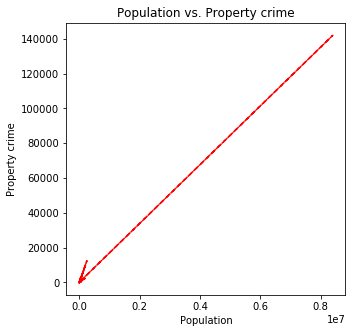

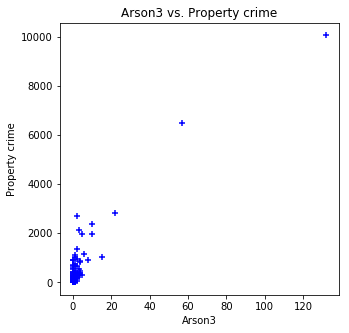

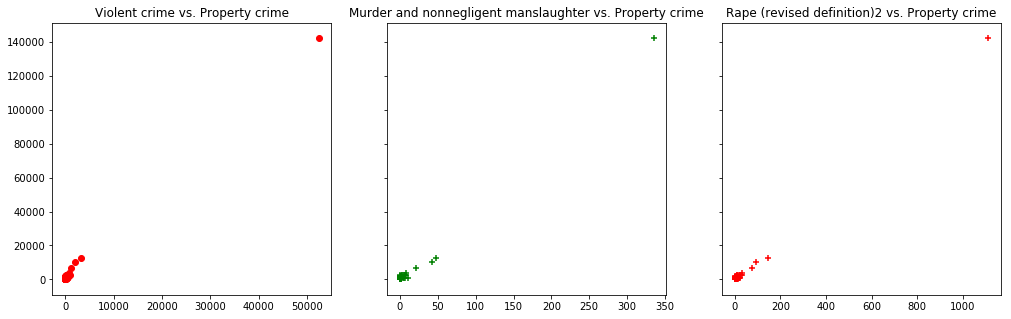

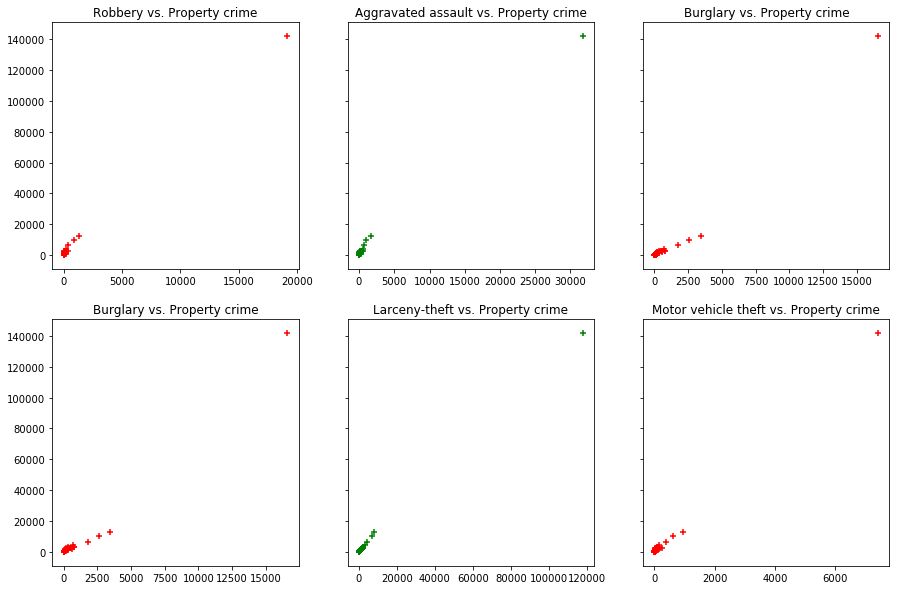

In [118]:
# visualize the relationship between the features and the response using scatterplots

## https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-demo-py
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df.Population, df[['Property\ncrime']], 'r--')
ax.set_title('Population vs. Property crime')
ax.set_xlabel('Population')
ax.set_ylabel('Property crime')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Arson3, df[['Property\ncrime']], c = 'b', marker = '+')
ax.set_title('Arson3 vs. Property crime')
ax.set_xlabel('Arson3')
ax.set_ylabel('Property crime')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(17,5))
ax1.scatter(df[['Violent\ncrime']], df[['Property\ncrime']], c='r', marker='o')
ax1.set_title('Violent crime vs. Property crime')
ax2.scatter(df[['Murder and\nnonnegligent\nmanslaughter']], df[['Property\ncrime']], c='g', marker='+')
ax2.set_title('Murder and nonnegligent manslaughter vs. Property crime')
ax3.scatter(df[['Rape\n(legacy\ndefinition)2']], df[['Property\ncrime']], c='r', marker='+')
ax3.set_title('Rape (revised definition)2 vs. Property crime')

fig, axarr = plt.subplots(2, 3, sharey=True, figsize=(15,10))
axarr[0, 0].scatter(df[['Robbery']], df[['Property\ncrime']], c='r', marker='+')
axarr[0, 0].set_title('Robbery vs. Property crime')
axarr[0, 1].scatter(df[['Aggravated\nassault']], df[['Property\ncrime']], c='g', marker='+')
axarr[0, 1].set_title('Aggravated assault vs. Property crime')
axarr[0, 2].scatter(df[['Burglary']], df[['Property\ncrime']], c='r', marker='+')
axarr[0, 2].set_title('Burglary vs. Property crime')
axarr[1, 0].scatter(df[['Burglary']], df[['Property\ncrime']], c='r', marker='+')
axarr[1, 0].set_title('Burglary vs. Property crime')
axarr[1, 1].scatter(df[['Larceny-\ntheft']], df[['Property\ncrime']], c='g', marker='+')
axarr[1, 1].set_title('Larceny-theft vs. Property crime')
axarr[1, 2].scatter(df[['Motor\nvehicle\ntheft']], df[['Property\ncrime']], c='r', marker='+')
axarr[1, 2].set_title('Motor vehicle theft vs. Property crime')

plt.show()

Calculate regression model of Property crime 